In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Loan_Default.csv")
df_def = df[df["Status"] == 1]
df_nodef = df[df["Status"] == 0]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


## Missing Values Check

In [5]:
p_missing = round((df.isnull().sum() * 100 / len(df)),2)
p_missing_default = round((df_def.isnull().sum() * 100 / len(df_def)),2)
p_missing_no_default = round((df_nodef.isnull().sum() * 100 / len(df_nodef)),2)

missing_values = pd.DataFrame({'column_name':df.columns,
                               'Overall Percent_Missing': p_missing,
                               'Default': p_missing_default,
                               'No Default': p_missing_no_default})
missing_values.sort_values("Overall Percent_Missing", inplace = True, ascending = False)

missing_values

,column_name,Overall Percent_Missing,Default,No Default
Upfront_charges,Upfront_charges,26.66,99.58,2.82
Interest_rate_spread,Interest_rate_spread,24.64,100.00,0.00
rate_of_interest,rate_of_interest,24.51,99.45,0.00
dtir1,dtir1,16.22,44.52,6.97
LTV,LTV,10.16,41.20,0.00
property_value,property_value,10.16,41.20,0.00
income,income,6.15,3.38,7.06
loan_limit,loan_limit,2.25,2.40,2.20
approv_in_adv,approv_in_adv,0.61,0.66,0.60
submission_of_application,submission_of_application,0.13,0.55,0.00


We see that for the columns "Interest Rate Spread", "Rate of Interest", "Upfront charges", the missing values are all where the loan Status is "1" - customer has defaulted on the loan.

These columns will be dropped. 

## Predictors with predominant values

In [6]:
categorical = ["loan_limit", "Gender", "approv_in_adv", "loan_type", "loan_purpose", "Credit_Worthiness","open_credit", "business_or_commercial",
               "term", "Neg_ammortization", "interest_only", "lump_sum_payment", "construction_type","occupancy_type", "Secured_by", "total_units",
               "credit_type", "co-applicant_credit_type", "age","submission_of_application", "Region", "Security_Type"] 
numerical = ["loan_amount", "rate_of_interest","Interest_rate_spread","Upfront_charges","property_value", "Credit_Score","income", "LTV", "dtir1"]

print("Categorical Variables")
for x in categorical:
    col = round(df[x].value_counts(normalize = True)*100,2).to_frame()
    first_value = col[x].iat[0]
    if first_value > 95:
        print("Column " + x + " has predominantly " + str(first_value)+ "% of values in one column: " + str(col.index[0]))

print("\nNumerical Variables")
for x in numerical:
    col = round(df[x].value_counts(normalize = True)*100,2).to_frame()
    first_value = col[x].iat[0]
    if first_value > 10:
        print("Column " + x + " has predominantly " + str(first_value)+ "% of values in one column: " + str(col.index[0]))


Categorical Variables
Column Credit_Worthiness has predominantly 95.74% of values in one column: l1
Column open_credit has predominantly 99.63% of values in one column: nopc
Column interest_only has predominantly 95.22% of values in one column: not_int
Column lump_sum_payment has predominantly 97.72% of values in one column: not_lpsm
Column construction_type has predominantly 99.98% of values in one column: sb
Column Secured_by has predominantly 99.98% of values in one column: home
Column total_units has predominantly 98.53% of values in one column: 1U
Column Security_Type has predominantly 99.98% of values in one column: direct

Numerical Variables
Column rate_of_interest has predominantly 12.88% of values in one column: 3.99
Column Upfront_charges has predominantly 19.05% of values in one column: 0.0


Variables with a pre-dominant percentage in one single value will be dropped.

## Separation Issues - @Arvind please help with the numeric variables

Credit_Worthiness


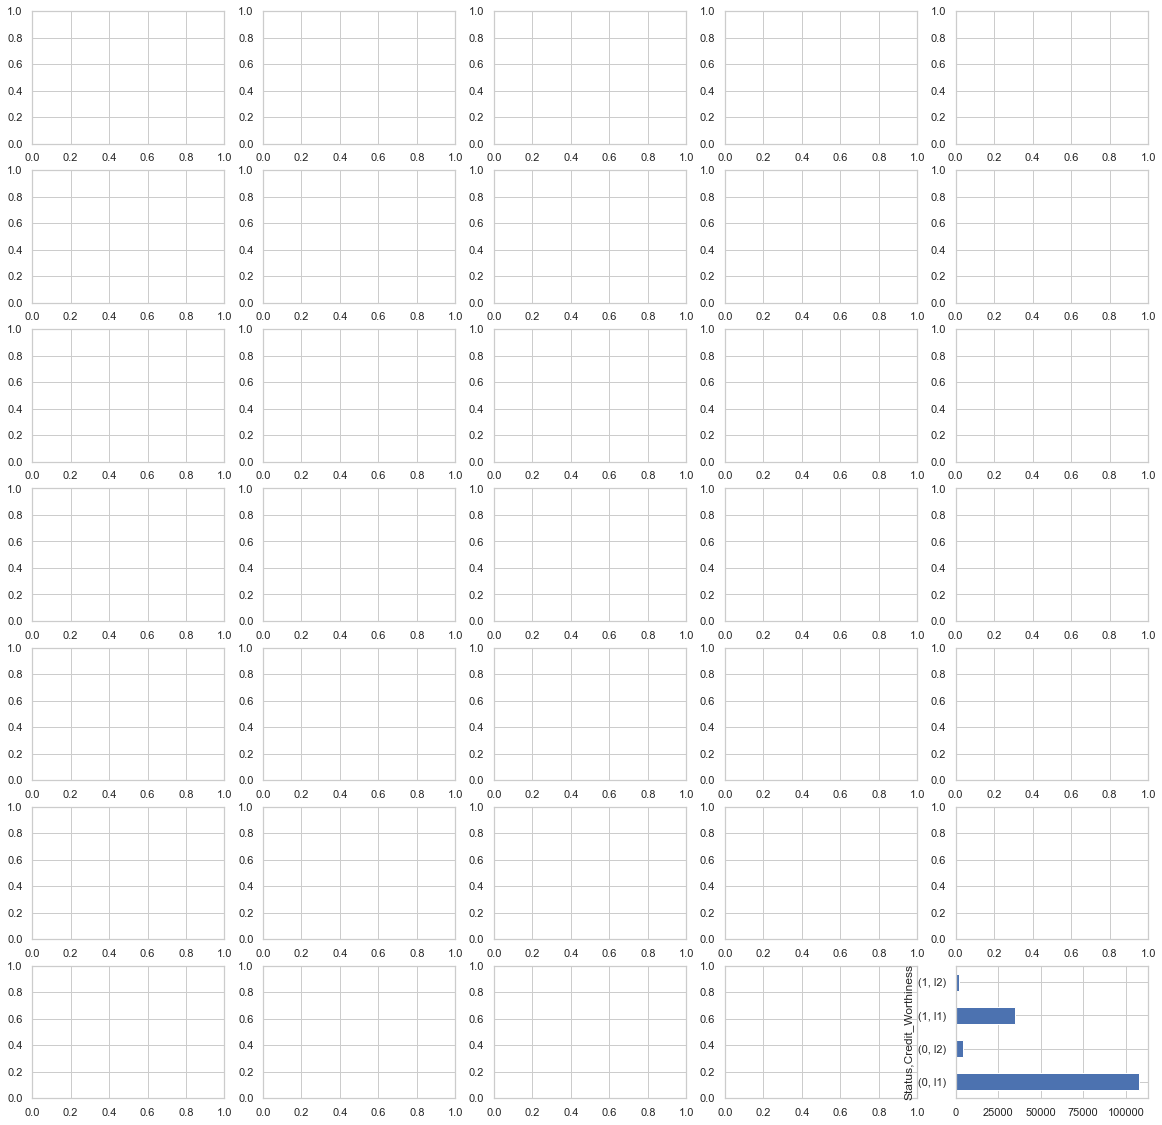

Gender


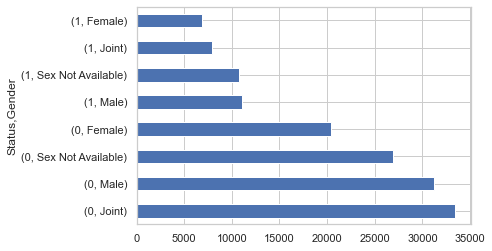

Neg_ammortization


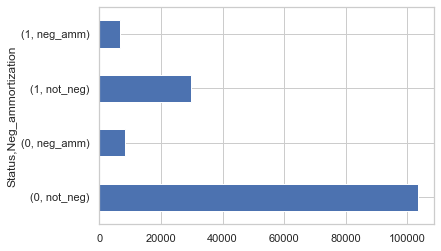

Region


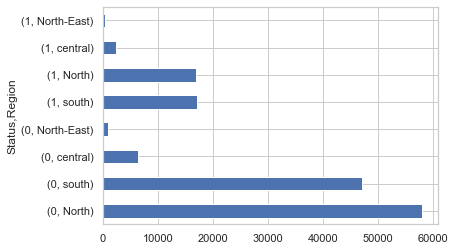

Secured_by


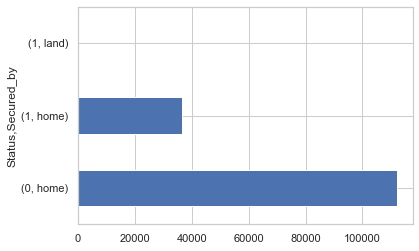

Security_Type


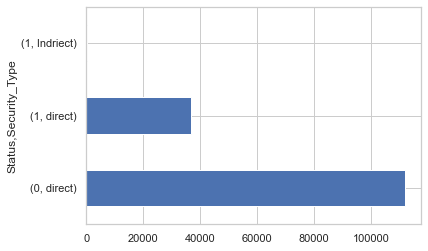

age


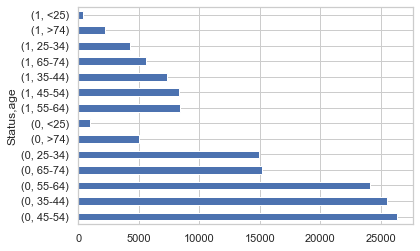

approv_in_adv


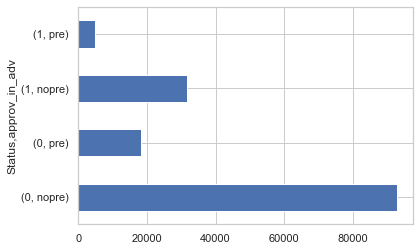

business_or_commercial


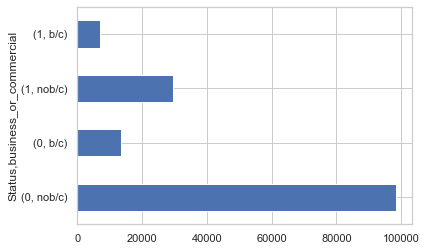

co-applicant_credit_type


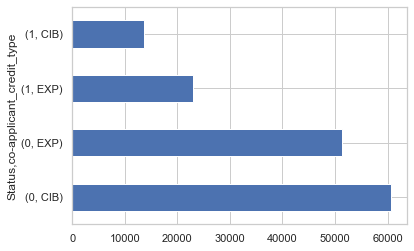

construction_type


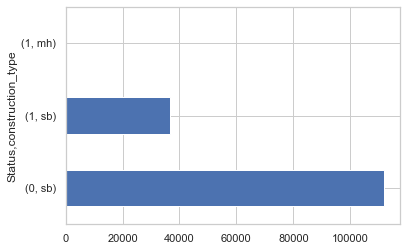

credit_type


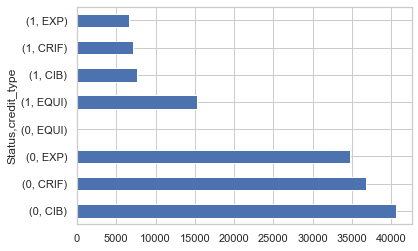

interest_only


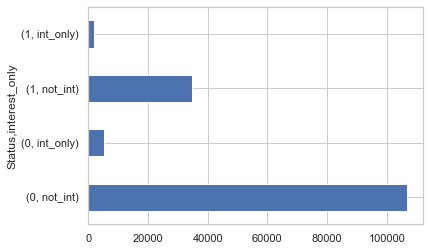

loan_limit


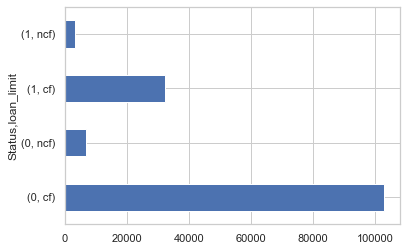

loan_purpose


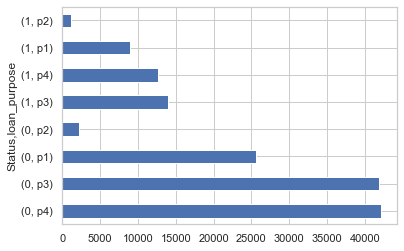

loan_type


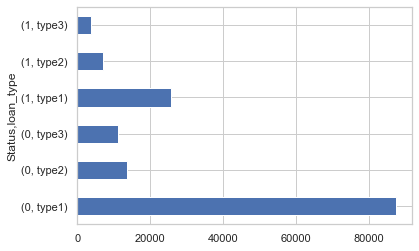

lump_sum_payment


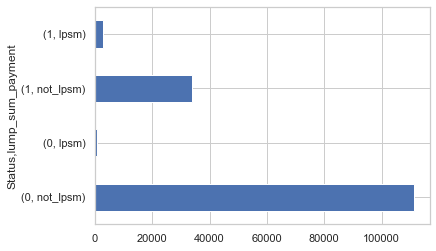

occupancy_type


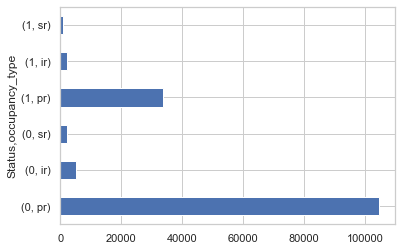

open_credit


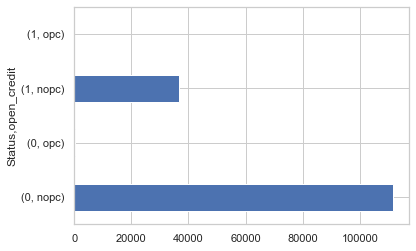

submission_of_application


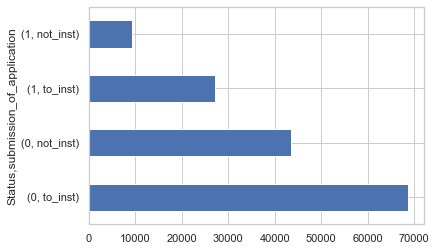

total_units


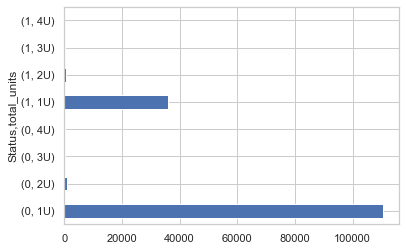

In [21]:
fig, ax = plt.subplots(7,5, figsize = (20,20))

# for x, subplot in zip(df.columns.difference(["ID", "year", "Status"]), ax.flatten()):
#     if df[x].unique().size < 10:
#         df.groupby("Status")[x].value_counts().plot(kind='barh', ax = subplot)
        


for x in df.columns.difference(["ID", "year", "Status"]):    
    if df[x].unique().size < 10:
        print(x)
        df.groupby("Status")[x].value_counts().plot(kind='barh')
        plt.set_cmap(cmap='coolwarm')
        plt.show()

# https://www.mathworks.com/matlabcentral/answers/293124-how-to-stack-hist
# think about how to make it look like JMP's



From the above plots, we can see that for the columns:

"Secured_by" - all non-defaults are secured by "Home";

"Security_Type" - all non-defaults are secured by "Direct".

These variables will be dropped to avoid quasi-complete separation issues.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# Correlation Checks for numerical variables

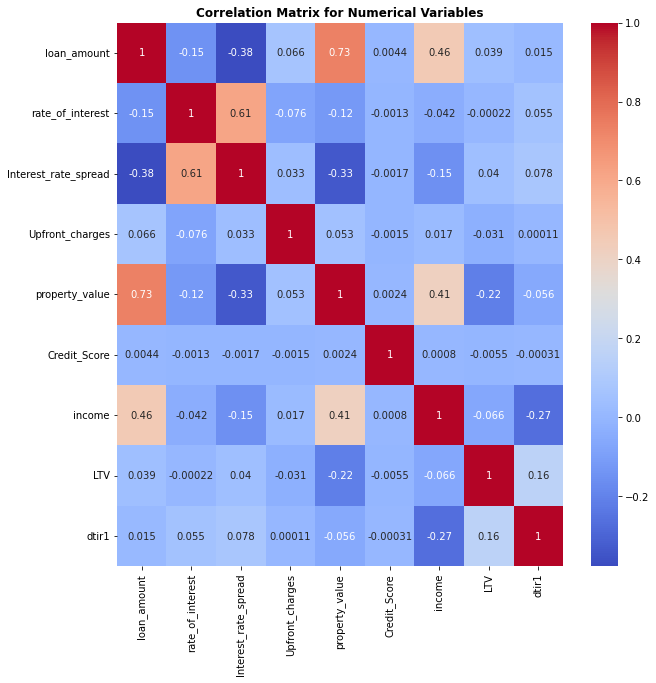

In [15]:
#from matplotlib.colors import LinearSegmentedColormap
#cmap = LinearSegmentedColormap.from_list(
#    name='test', 
#    colors=['black','white','green','white','black'])

num_df = df[numerical]
corrMatrix = num_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Correlation Matrix for Numerical Variables", fontweight = "bold")
sns.heatmap(corrMatrix, annot = True, cmap='coolwarm') #cmap = cmap)
plt.show()

No significant correlation detected between numerical variables.

In [9]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def boxes(data, x, y,hue, dodge=True, showmeans=False,meanline=False, title = "title"):
    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(figsize=(8,8))
    plt.ticklabel_format(style='plain', axis='y')
    if y == "loan_amount":
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x/1)))
    sns.boxplot(x = x, y = y, hue = hue, data = df, dodge = False, showmeans=True, meanline=True)
    plt.title(title, fontweight = "bold")
    plt.show()

def bargraphs(data, x, y, hue, title = "title", xaxis = "xaxis", yaxis = "yaxis"):
    sns.set_theme(style="whitegrid")
    g = sns.catplot(
    data=data, kind="bar",
    x=x, y=y, hue=hue,
    ci="sd", palette="dark", alpha=.6, height=6, order=order)
    g.set(title = title)
    g.set_axis_labels(xaxis, yaxis)
    g.legend.set_title(y)

In [16]:
bargraphs(df_da, "age", "count", "Status", title = "x", xaxis = "xaxis", yaxis = "y")

boxes(df, "Status", "loan_amount", "Status")

NameError: name 'order' is not defined

# Default and Age

The proportion of defaults in age group <25 is 28.95%.
The proportion of defaults in age group 25-34 is 22.19%.
The proportion of defaults in age group 35-44 is 22.27%.
The proportion of defaults in age group 45-54 is 24.05%.
The proportion of defaults in age group 55-64 is 25.89%.
The proportion of defaults in age group 65-74 is 26.86%.
The proportion of defaults in age group >74 is 30.01%.


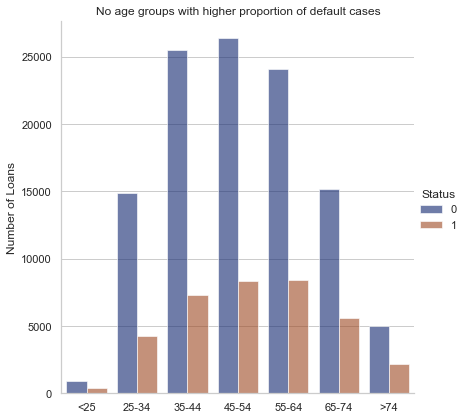

In [ ]:
sns.set_theme(style="whitegrid")

order = ["<25", "25-34", "35-44", "45-54", "55-64", "65-74",">74"]

df_da = df.groupby(["age", "Status"])["Status"].count().reset_index(name="count")

g = sns.catplot(
    data=df_da, kind="bar",
    x="age", y="count", hue="Status",
    ci="sd", palette="dark", alpha=.6, height=6, order=order)

g.set(title = "No age groups with higher proportion of default cases")
g.set_axis_labels("", "Number of Loans")
g.legend.set_title("Status")

for i in order:
    a = df_da[df_da["age"] == i]
    default = a.query("Status==1")["count"].values[0]
    no_default = a.query("Status==0")["count"].values[0]
    proportion = default/(default + no_default)
    print("The proportion of defaults in age group {} is {:.2f}%.".format(str(i), (proportion*100)) )

From the above plot, we do not observe any higher proportion of default with regards to any age groups. 

The overall trend for default seems to follow the overall trend of loans across different age groups. As this dataset is on mortgage loans, we see that the highest number of loans granted is highest for the age groups of 35-44, 45-54, and 55-64. 

# Default and Loan Amounts

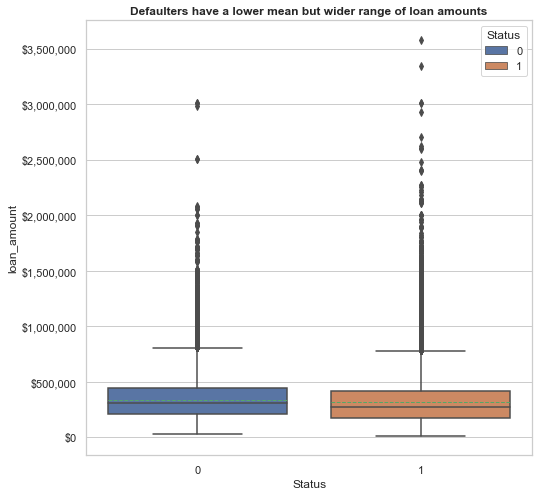

                 mean  percentile_25  percentile_50  percentile_75      max    min
Status                                                                            
0       334990.774875       206500.0       306500.0       446500.0  3006500  26500
1       319275.184912       176500.0       276500.0       416500.0  3576500  16500


In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x/1)))
sns.boxplot(x = "Status", y = "loan_amount", hue = "Status", data = df, dodge = False, showmeans=True, meanline=True)
plt.title("Defaulters have a lower mean but wider range of loan amounts", fontweight = "bold")

#sns.stripplot(x = "Status", y = "loan_amount", data = df, color = "grey", jitter = 0.05)
plt.show()

print(df.groupby(["Status"])["loan_amount"].agg(["mean", percentile(25),percentile(50),percentile(75), "max", "min"]))

# Default and different loan amounts bin

The proportion of defaults in loan amount group (16499.0, 176500.0] is 30.50%.
The proportion of defaults in loan amount group (176500.0, 256500.0] is 25.09%.
The proportion of defaults in loan amount group (346500.0, 476500.0] is 21.36%.
The proportion of defaults in loan amount group (476500.0, 3576500.0] is 22.49%.
The proportion of defaults in loan amount group (256500.0, 346500.0] is 23.23%.


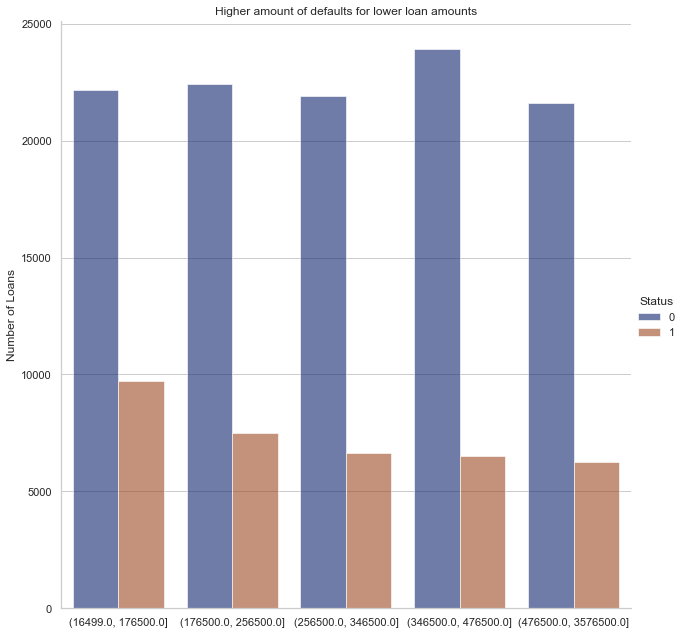

In [ ]:
df["loan_amount_binned"] = pd.qcut(df["loan_amount"],q=5, precision = 0)
loan_amount_bins = df["loan_amount_binned"].unique().tolist()

df_dl = df.groupby(["loan_amount_binned", "Status"])["Status"].count().reset_index(name="count")

g = sns.catplot(
    data=df_dl, kind="bar",
    x="loan_amount_binned", y="count", hue="Status",
    ci="sd", palette="dark", alpha=.6, height=9)

g.set(title = "Higher amount of defaults for lower loan amounts")
g.set_axis_labels("", "Number of Loans")
g.legend.set_title("Status")

for i in loan_amount_bins:
    a = df_dl[df_dl["loan_amount_binned"] == i]
    default = a.query("Status==1")["count"].values[0]
    no_default = a.query("Status==0")["count"].values[0]
    proportion = default/(default + no_default)
    print("The proportion of defaults in loan amount group {} is {:.2f}%.".format(str(i), (proportion*100)) )

The proportion of default is higher for lower loan amounts. 

# Loan Amounts and Age

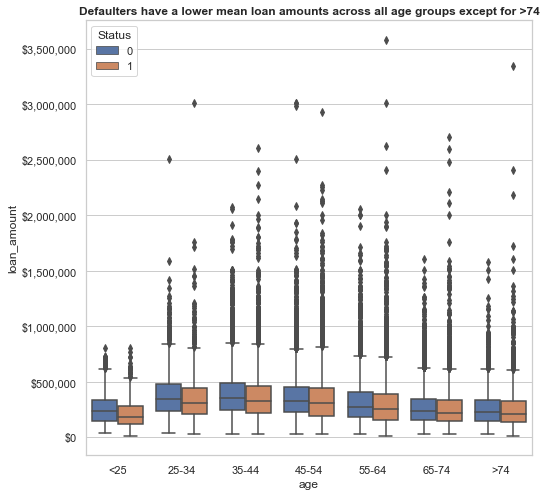

                       mean  percentile_25  percentile_50  percentile_75      max    min
age   Status                                                                            
25-34 0       363044.246005       236500.0       346500.0       476500.0  2506500  36500
      1       337975.988701       206500.0       306500.0       446500.0  3006500  26500
35-44 0       380132.051433       246500.0       356500.0       486500.0  2076500  26500
      1       363781.433849       216500.0       326500.0       466500.0  2606500  26500
45-54 0       355022.998749       226500.0       326500.0       456500.0  3006500  26500
      1       345517.846449       196500.0       306500.0       446500.0  2926500  26500
55-64 0       307981.834771       186500.0       276500.0       406500.0  2056500  26500
      1       300069.223462       156500.0       256500.0       386500.0  3576500  16500
65-74 0       269430.204969       156500.0       236500.0       346500.0  1606500  26500
      1       268169.

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x/1)))
sns.boxplot(x = "age", y = "loan_amount", hue = "Status", data = df, order = order)
plt.title("Defaulters have a lower mean loan amounts across all age groups except for >74", fontweight = "bold")

plt.show()

print(df.groupby(["age","Status"])["loan_amount"].agg(["mean", percentile(25),percentile(50),percentile(75), "max", "min"]))

# Loan Amounts and business_or_commercial vs Default

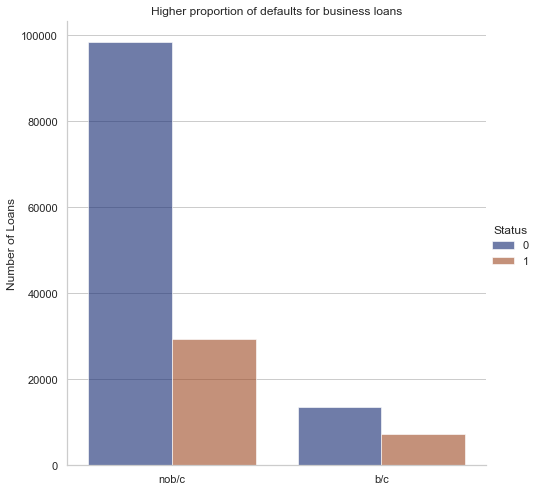

The proportion of defaults in nob/c business or commercial group is 23.04%.
The proportion of defaults in b/c business or commercial group is 34.54%.


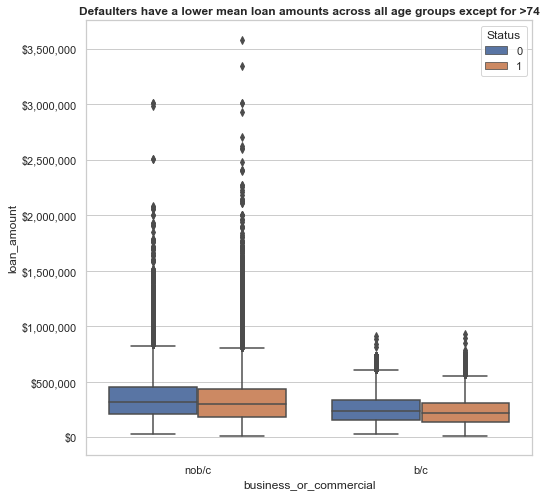

                                        mean  percentile_25  percentile_50  percentile_75      max    min
business_or_commercial Status                                                                            
b/c                    0       267054.819720       156500.0       236500.0       336500.0   916500  26500
                       1       237778.583380       136500.0       216500.0       306500.0   926500  16500
nob/c                  0       344369.485275       206500.0       316500.0       456500.0  3006500  26500
                       1       339110.717073       186500.0       296500.0       436500.0  3576500  16500


In [ ]:
df_biz = df.groupby(["business_or_commercial", "Status"])["Status"].count().reset_index(name="count")
biz_or_comm = ["nob/c", "b/c"]

g = sns.catplot(
    data=df_biz, kind="bar",
    x="business_or_commercial", y="count", hue="Status",
    ci="sd", palette="dark", alpha=.6, height=7, order = biz_or_comm)
g.set(title = "Higher proportion of defaults for business loans")
g.set_axis_labels("", "Number of Loans")
g.legend.set_title("Status")

plt.show()

for i in biz_or_comm:
    a = df_biz[df_biz["business_or_commercial"] == i]
    default = a.query("Status==1")["count"].values[0]
    no_default = a.query("Status==0")["count"].values[0]
    proportion = default/(default + no_default)
    print("The proportion of defaults in {} business or commercial group is {:.2f}%.".format(str(i), (proportion*100)) )

fig, ax = plt.subplots(figsize=(8,8))
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x/1)))
sns.boxplot(x = "business_or_commercial", y = "loan_amount", hue = "Status", data = df)
plt.title("Defaulters have a lower mean loan amounts across all age groups except for >74", fontweight = "bold")
plt.show()

print(df.groupby(["business_or_commercial","Status"])["loan_amount"].agg(["mean", percentile(25),percentile(50),percentile(75), "max", "min"]))

# Default and Loan Types

# Default and Loan Purpose

# Default and Credit_Worthiness

# Can we run a loop to generate all these graphs automatically? have define the functions then can just dump the variables into them to generate the box/barcharts